<a href="https://colab.research.google.com/github/Anukriti2001/Anukriti/blob/master/19BDS0068__Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sympy
from sympy import *
from IPython.core.interactiveshell import InteractiveShell
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity
import itertools as it
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import multivariate_normal
from matplotlib.gridspec import GridSpec
from matplotlib import cm
import math
from scipy.integrate import trapz

In [2]:
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams[ "figure.figsize" ] = (10,10)
origin2D = np.vstack([0,0])
origin3D = np.vstack([0,0,0])
scale = 10

CONSTRUCTION OF PROBABILITY SPACE

In [3]:
d = Symbol('d')
p = Symbol('p')
options = [d,p]
omega = list(it.product(options,repeat=2))
omega

[(d, d), (d, p), (p, d), (p, p)]

In [4]:
X = [(i).count(d) for i in omega]
T = np.unique(X)
X
T

[2, 1, 1, 0]

array([0, 1, 2])

In [5]:
pd = .3
pnd = 1-pd

omegaP = np.vstack([[pd if i == d else pnd for i in np.vstack(omega)[:,0]],[pd if i == d else pnd for i in np.vstack(omega)[:,1]]]).T
omegaP = [i[0]*i[1] for i in omegaP]
omegaP = np.vstack([X,omegaP]).T
omegaP

array([[2.  , 0.09],
       [1.  , 0.21],
       [1.  , 0.21],
       [0.  , 0.49]])

In [6]:
P = lambda x: [i for i in omegaP if x == i[0]] # PMF. For any input value, find probability in event space table.
Ss = T[::-1]
[sum(i)[1] for i in [P(i) for i in Ss]] # Check all values in our target space.

[0.09, 0.42, 0.48999999999999994]

DISCRETE AND COTINUOUS PROBABILITIES

In [8]:
ys = np.linspace(1,3,3)
xs = np.linspace(1,5,5)
xy = np.vstack([(x,y) for x in xs for y in ys])
Matrix(xy[:5])
eventCount = 100
events = xy[np.random.choice(len(xy),100)]
Matrix(events[:5])

Matrix([
[1.0, 1.0],
[1.0, 2.0],
[1.0, 3.0],
[2.0, 1.0],
[2.0, 2.0]])

Matrix([
[3.0, 3.0],
[4.0, 2.0],
[5.0, 2.0],
[1.0, 3.0],
[1.0, 2.0]])

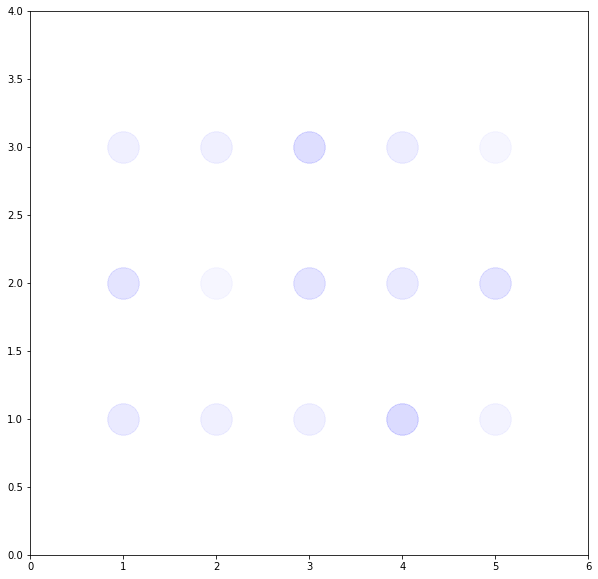

In [36]:
plt.scatter(events[:,0], events[:,1] ,s=1000, alpha = 1/eventCount, c = "b")
plt.axis([0,6,0,4]);

In [10]:
Xevents = np.vstack(np.unique(events[:,0],return_counts=True)).T
Yevents = np.vstack(np.unique(events[:,1],return_counts=True)).T
Xevents = np.hstack([Xevents,np.vstack([i/sum(Xevents[:,1]) for i in Xevents[:,1]])])
Yevents = np.hstack([Yevents,np.vstack([i/sum(Yevents[:,1]) for i in Yevents[:,1]])])
Matrix(Xevents)
Matrix(Yevents)

Matrix([
[1.0, 21.0, 0.21],
[2.0, 13.0, 0.13],
[3.0, 25.0, 0.25],
[4.0, 25.0, 0.25],
[5.0, 16.0, 0.16]])

Matrix([
[1.0, 33.0, 0.33],
[2.0, 37.0, 0.37],
[3.0, 30.0,  0.3]])

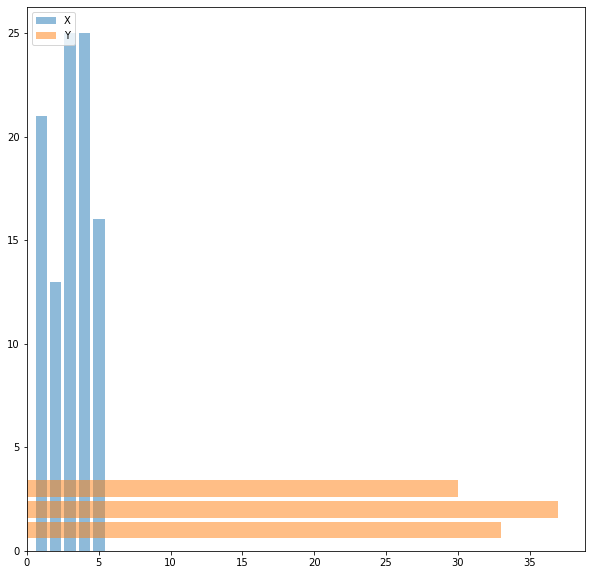

In [11]:
plt.bar(Xevents[:,0],Xevents[:,1],alpha=.5,label = "X")
plt.barh(Yevents[:,0],Yevents[:,1],alpha=.5,label = "Y")
# plt.axis([0,10,0,10])
plt.legend(loc=2);

In [12]:
n = np.random.choice(len(events),1)
n

array([39])

In [13]:
testEvent = events[n]
testEvent

array([[3., 3.]])

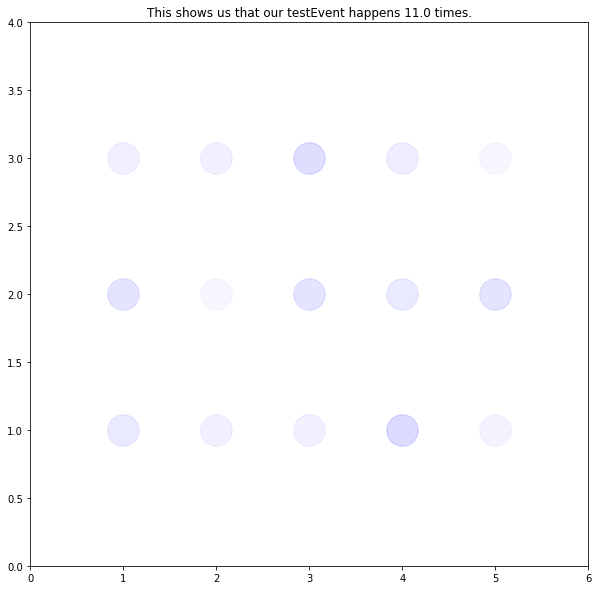

In [37]:
eventOccurances = [i for i in events if (i == testEvent).all()]
plt.scatter(events[:,0], events[:,1] ,s=1000, alpha = 1/eventCount, c = "b")
plt.axis([0,6,0,4])
plt.title(r"This shows us that our testEvent happens %1.1f times." % len(eventOccurances));

In [15]:
# Grabs the X value from our test event and uses it as an index for our Xevents.
columnOccurances = Xevents[int(testEvent[0][0]-1)][1]
columnOccurances
len(eventOccurances)/columnOccurances

25.0

0.44

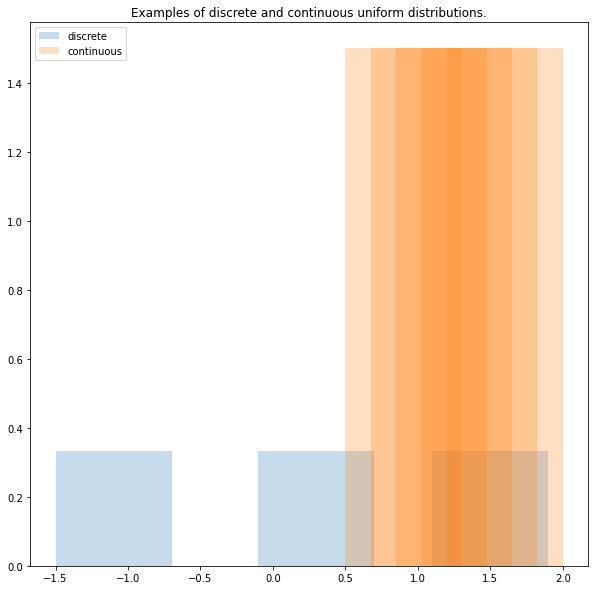

In [16]:
z = [-1.1,.3,1.5]
X = np.linspace(.9,1.6,5)
p = [1/len(z) for i in z]
zp = np.vstack([z,p]).T
plt.bar(zp[:,0],zp[:,1], alpha=.25, label="discrete")
plt.bar(X,np.linspace(1.5,1.5,5), alpha=.25, label = "continuous")
plt.title("Examples of discrete and continuous uniform distributions.")
plt.legend();

SUM RULE, PRODUCT RULE, AND BAYES' THEOREM

In [17]:
As = [1,2,3,4]
pA = [.25,.25,.25,.25]

# Bayes: p(a|b) = p(a)*p(b|a) / p(b)
bayes = lambda pa, pba, pbSum: pa*pba/pbSum

allPa = [.5,.25,.25]
allPb = [.3,.4,.5]

# pb = event of winning =  all events of winning regardless of group, summed up 
# pb = sum of all p(a intersection b) = p(a)*p(b|a)
pbSum = np.dot(allPa,allPb)


# p(a) = .5, event of being in group a
# p(b|a) = .3, event of winning, given that group
bayes(allPa[0],allPb[0],pbSum)

0.39999999999999997

SUMMARY STATISTICS AND INDEPENDENCE

In [18]:
mean1 = np.array([10,2])
mean2 = np.array([0,0])
cov1 = np.vstack([[1,0],[0,1]])
cov2 = np.vstack([[1.7,2.],[2.,8.4]]) # Note, diagonals flipped from book to match figure shape.
Matrix(mean1)
Matrix(cov1)
Matrix(mean2)
Matrix(cov2)

Matrix([
[10],
[ 2]])

Matrix([
[1, 0],
[0, 1]])

Matrix([
[0],
[0]])

Matrix([
[1.7, 2.0],
[2.0, 8.4]])

In [19]:
n = 3000
first = np.round(np.random.multivariate_normal(mean1, cov1, int(n/4))*.4,3) # n/4 to adjust distribution to book figure for countour plot.
second = np.round(np.random.multivariate_normal(mean2, cov2, n)*.6,3)
data = np.vstack([first,second])
np.shape(data)
Matrix(data[:5])

(3750, 2)

Matrix([
[4.693, 1.057],
[4.018, 1.976],
[ 4.18, 0.947],
[3.613, 0.904],
[4.109, 1.099]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sea

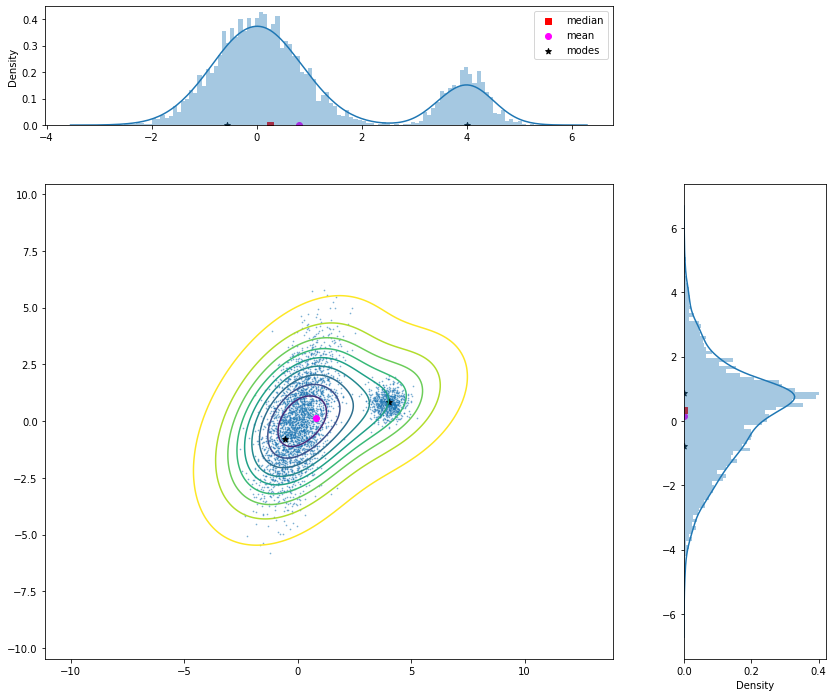

In [20]:
# Figure setup.
fig = plt.figure(figsize=(14, 12))
gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4])
ax1 = fig.add_subplot(gs[0])
ax3 = fig.add_subplot(gs[2])
ax3.axis('equal')
ax4 = fig.add_subplot(gs[3])
bins = 100
# Figure setup.

# Central scatter plot.
ax3.scatter(data[:,0],data[:,1], s = .5, alpha = .5)
sns.kdeplot(data[:,0], data[:,1],n_levels=10, cmap="viridis_r", ax = ax3, bw = 1)
ax3.scatter(np.mean(data[:,0]),np.mean(data[:,1]), marker = "o", color = "magenta")
ax3.scatter(max(set(first[:,0]), key=list(first[:,0]).count), max(set(first[:,1]), key=list(first[:,1]).count), marker = "*", c = "k")
ax3.scatter(max(set(second[:,0]), key=list(second[:,0]).count), max(set(second[:,1]), key=list(second[:,1]).count), marker = "*", c = "k")
# Central scatter plot.

# X distribution.
sns.distplot(data[:,0], ax = ax1, bins = bins)
ax1.scatter(np.median(data[:,0]),0, label = "median", marker = "s", c = "r")
ax1.scatter(np.mean(data[:,0]), 0, label = "mean", marker = "o", c = "magenta")
ax1.scatter(max(set(first[:,0]), key=list(first[:,0]).count),0, label = "modes", marker = "*", c = "k")
ax1.scatter(max(set(second[:,0]), key=list(second[:,0]).count),0, label="_nolegend_", marker = "*", c = "k")
ax1.legend()
# X distribution.

# Y distribution.
sns.distplot(data[:,1], ax = ax4, vertical = True, bins = bins)
ax4.scatter(0,max(set(first[:,1]), key=list(first[:,1]).count), marker = "*", c = "k")
ax4.scatter(0,max(set(second[:,1]), key=list(second[:,1]).count), marker = "*", c = "k")
ax4.scatter(0, np.mean(data[:,1]), marker = "o", c = "magenta")
ax4.scatter(0,np.median(data[:,1]), marker = "s", c = "r");
# Y distribution.

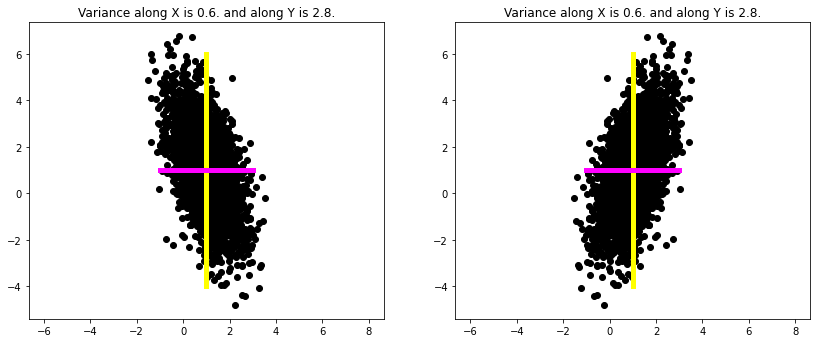

In [42]:
# Data setup.
A = 1+second@np.vstack([[-1,0],[0,1]])
B = 1+second
# Data setup.

# Figure setup.
fig = plt.figure(figsize=(14, 12))
gs = GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0])
ax1.axis("equal")
ax2 = fig.add_subplot(gs[1])
ax2.axis("equal")
# Figure setup.

# Left plot.
ax1.scatter(A[:,0],A[:,1], c = "k")
ax1.plot(np.mean(A[:,0])*np.ones(100),np.linspace(-4,6,100), c = "yellow", lw = 5)
ax1.plot(np.linspace(-1,3,100),np.mean(A[:,1])*np.ones(100), c = "magenta", lw = 5)
ax1.set_title("Variance along X is %1.1f." %np.var(A[:,0]) + " and along Y is %1.1f." %np.var(A[:,1]))

# Right plot.
ax2.scatter(B[:,0],B[:,1], c = "k")
ax2.plot(np.mean(B[:,0])*np.ones(100),np.linspace(-4,6,100), c = "yellow", lw = 5)
ax2.plot(np.linspace(-1,3,100),np.mean(B[:,1])*np.ones(100), c = "magenta", lw = 5)
ax2.set_title("Variance along X is %1.1f." %np.var(B[:,0]) + " and along Y is %1.1f." %np.var(B[:,1]));

In [22]:
"A."
Matrix(np.corrcoef(A[:,0],A[:,1]))
"B."
Matrix(np.corrcoef(B[:,0],B[:,1]))

'A.'

Matrix([
[               1.0, -0.523095062574112],
[-0.523095062574112,                1.0]])

'B.'

Matrix([
[              1.0, 0.523095062574112],
[0.523095062574112,               1.0]])

In [23]:
Matrix(np.cov(A[:,0],A[:,1])/np.sqrt(np.var(A[:,0])*np.var(A[:,1])))
Matrix(np.cov(B[:,0],B[:,1])/np.sqrt(np.var(B[:,0])*np.var(B[:,1])))

Matrix([
[ 0.463557826932565, -0.523269485736023],
[-0.523269485736023,   2.15866703571759]])

Matrix([
[0.463557826932565, 0.523269485736023],
[0.523269485736023,  2.15866703571759]])

In [24]:
np.mean([(i - np.mean(A[:,0]))**2 for i in A[:,0]])
np.mean(A[:,0]**2)-np.mean(A[:,0])**2
(np.sum(A[:,0]**2) /len(A[:,0]) - (np.sum(A[:,0])/len(A[:,0]))**2) #*2 
np.var(A[:,0])

0.6072901396

0.6072901396000002

0.6072901396000002

0.6072901396

In [43]:
np.mean(A[:,0] + A[:,1]), np.mean(A[:,0]) + np.mean(A[:,1]) # 6.46
np.mean(A[:,0] - A[:,1]), np.mean(A[:,0]) - np.mean(A[:,1]) # 6.47
np.var(A[:,0] + A[:,1])
np.var(A[:,0]) + np.var(A[:,1]) + np.cov(A[:,0], A[:,1]) + np.cov(A[:,1], A[:,0]) # 6.48
np.var(A[:,0] - A[:,1])
np.var(A[:,0]) + np.var(A[:,1]) - np.cov(A[:,0], A[:,1]) - np.cov(A[:,1], A[:,0]) # 6.49

(1.9845333333333333, 1.9845333333333333)

(0.000626666666666677, 0.0006266666666665532)

2.0642484048888887

array([[6.87170708, 2.06379124],
       [2.06379124, 6.87170708]])

4.806313196622222

array([[-1.14547543e-03,  4.80677036e+00],
       [ 4.80677036e+00, -1.14547543e-03]])

In [26]:
tempX = np.random.standard_normal(100000)
np.mean(tempX)
np.mean(tempX**3)
tempY = tempX**2
tempY

0.006374755886685657

0.02168022770808372

array([6.89006532e-02, 2.00273508e-04, 3.30850947e-02, ...,
       2.55053860e+00, 2.30290085e-01, 3.19529649e-01])

In [27]:
np.cov(tempX,tempY)[1][0]
np.mean(tempX*tempY) - np.mean(tempX)*np.mean(tempY)
np.mean(tempX**3)

0.015292384355593266

0.015292231431749709

0.02168022770808372

In [28]:
# 6.60
np.sqrt(np.cov(tempX,tempX)) 
np.var(tempX)

array([[1.00102267, 1.00102267],
       [1.00102267, 1.00102267]])

1.0020363658869977

In [29]:
# 6.61
cosAngle = lambda x, y: (np.dot(x.T,y)/np.sqrt(np.dot(np.dot(x.T,x),np.dot(y.T,y))))
angle = lambda cos: np.arccos(cos)*(180/np.pi)
angle(cosAngle(tempX,tempY))
angle((np.cov(tempX,tempY)/np.sqrt(np.var(tempX)*np.var(tempY))))

89.28709879179692

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until


array([[45.30658861, 89.38501153],
       [89.38501153,         nan]])

In [30]:
A = np.sqrt(np.var(tempX)) # Vector magnitudes.
B = np.sqrt(np.var(tempY))
C = np.sqrt(np.var(tempX+tempY)) 
A,B,C
theta = np.arctan(B)/A # Calculating C direction.
theta, angle(theta)
Cvec = np.dot(npl.norm(C),[np.cos(theta),np.sin(theta)])[::-1]
Cvec

(1.0010176651223484, 1.4233033236893253, 1.7488319473224345)

(0.9573593305323178, 16.792101962631985)

array([1.42997483, 1.00676967])

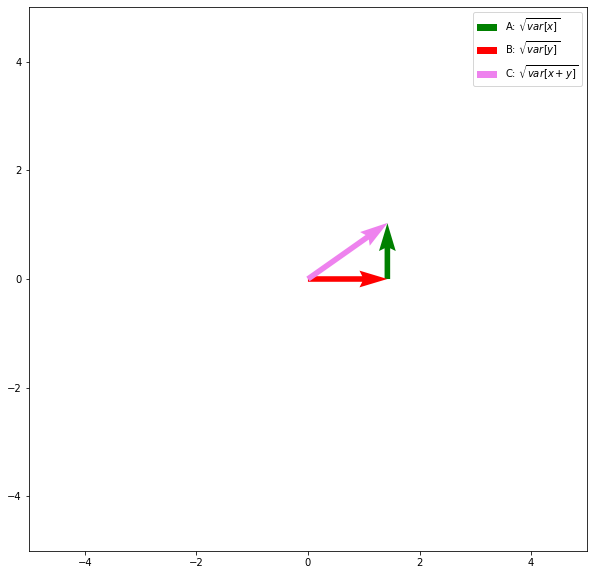

In [41]:
scale = 10
plt.quiver(*[B,0],*[0,A], scale = scale, width = .01,  color = "green", label = r"A: $\sqrt{var[x]}$")
plt.quiver(B,0, scale = scale, width = .01, color = "red", label = r"B: $\sqrt{var[y]}$")
plt.quiver(*[0,0],*Cvec, scale = scale, width = .01,  color = "violet", label = r"C: $\sqrt{var[x+y]}$")
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.legend();